**IMPORT LIBRARY YANG DIPERLUKAN**

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**LOAD MODEL DAN DATA UJI**

In [2]:
print("Memuat model dan data uji...")
clf = joblib.load("weather_model.pkl")
label_encoder = joblib.load("weather_label_encoder.pkl")

X_test = pd.read_csv("X_test_weather.csv")
y_test = pd.read_csv("y_test_weather.csv").squeeze()

Memuat model dan data uji...


**MELAKUKAN PREDIKSI**

In [3]:
y_pred = clf.predict(X_test)

**EVALUASI AKURASI DAN LAPORAN KLASIFIKASI**

In [4]:
print("\nEvaluasi Model:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Evaluasi Model:
Akurasi: 0.7304
Presisi: 0.7408
Recall: 0.7304
F1 Score: 0.7351

Laporan Klasifikasi:
              precision    recall  f1-score   support

     drizzle       0.06      0.11      0.08         9
         fog       0.18      0.16      0.17        25
        rain       0.90      0.90      0.90       120
        snow       0.33      0.25      0.29         8
         sun       0.77      0.76      0.76       131

    accuracy                           0.73       293
   macro avg       0.45      0.44      0.44       293
weighted avg       0.74      0.73      0.74       293



**CONFUSION MATRIX**

Menampilkan Confusion Matrix...


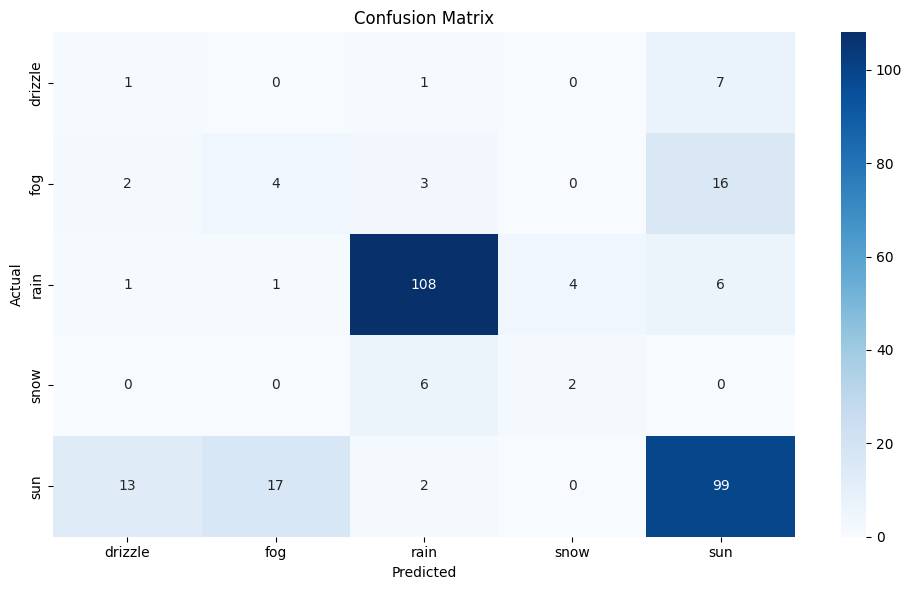

In [6]:
print("Menampilkan Confusion Matrix...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()